# Cohorts of Songs Unsupervised Learning Implementation
**Problem Scenario:** The customer always looks forward to specialized treatment,
whether shopping over an e-commerce website or watching Netflix. They want what
they might like to see. To keep the customers engaged, it is also crucial for companies
to always present the most relevant information. Spotify is a Swedish audio streaming
and media service provider. The company has over 456 million active monthly users,
including over 195 million paying subscribers, as of September 2022. The company
intends to create cohorts of different songs that will aid in the recommendation of songs
to users based on various relevant features. Each cohort would contain similar types of
songs.

**Problem Objective:**
As a data scientist, you should perform exploratory data analysis and perform cluster
analysis to create cohorts of songs. The goal is to gain a better understanding of the
various factors that contribute to creating a cohort of songs.

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [448]:
df_main = pd.read_csv("rolling_stones_spotify.csv")
df = df_main
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


# Data Cleaning

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [450]:
df.shape

(1610, 18)

In [451]:
df.drop_duplicates(subset='Unnamed: 0', inplace=True)

In [452]:
df.shape

(1610, 18)

In [453]:
df.drop(columns=['Unnamed: 0', 'id', 'uri'], axis=1, inplace=True)
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [454]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [482]:
# create year, month and date features from release_date 
df['release_date'] = pd.to_datetime(df['release_date'])  # Ensure full date format
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day
df.drop(columns=['release_date'], inplace=True, axis=1)
df.head(2)

,name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year,release_month,release_day,popularity_label
1,Street Fighting Man - Live,Licked Live In NYC,2,0.437,0.326,0.965,0.233,0.961,-4.803,0.0759,0.500239,0.318,34,0.241629,2022,6,10,High
2,Start Me Up - Live,Licked Live In NYC,3,0.416,0.386,0.969,0.400,0.956,-4.936,0.1150,0.492057,0.313,34,0.252023,2022,6,10,High


In [457]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms',
       'release_year', 'release_month', 'release_day'],
      dtype='object')

In [458]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year,release_month,release_day
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199,1991.745963,7.349068,14.381366
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000,1964.000000,1.000000,1.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000,1970.000000,5.000000,7.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000,1986.000000,7.000000,13.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000,2017.000000,10.000000,22.000000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000,2022.000000,12.000000,31.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920,22.440296,3.191021,8.787451


#### Normalization (Min-Max Scaling) of tempo and duration_ms

In [459]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['tempo', 'duration_ms']] = scaler.fit_transform(df[['tempo', 'duration_ms']])
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year,release_month,release_day
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,0.420994,0.0302,33,0.028766,2022,6,10
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,0.500239,0.3180,34,0.241629,2022,6,10
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,0.492057,0.3130,34,0.252023,2022,6,10
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,0.509303,0.1470,32,0.296483,2022,6,10
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,0.494808,0.2060,32,0.295677,2022,6,10


#### Checking for Outliers using IQR

In [460]:
# drop track_number and popularity, as its not a continuous variable
numerical_cols = df.select_dtypes(include=['number']).drop(columns=['track_number', 'popularity'])
numerical_cols.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,release_year,release_month,release_day
0,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,0.420994,0.0302,0.028766,2022,6,10
1,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,0.500239,0.3180,0.241629,2022,6,10
2,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,0.492057,0.3130,0.252023,2022,6,10
3,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,0.509303,0.1470,0.296483,2022,6,10
4,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,0.494808,0.2060,0.295677,2022,6,10


In [461]:
def detect_outliers_iqr(data):

    outliers = {}
    for col in data.columns:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col].values

    return outliers

In [462]:
# Detect outliers
outliers_dict = detect_outliers_iqr(numerical_cols)

# Print outliers
for feature, outlier_values in outliers_dict.items():
    print(f"Feature: {feature}")
    print(f"Outliers Count: {len(outlier_values)}")
    print(f"Outliers: {outlier_values if len(outlier_values) > 0 else 'None'}")
    print("*" * 50)

Feature: acousticness
Outliers Count: 4
Outliers: [0.935 0.994 0.994 0.939]
**************************************************
Feature: danceability
Outliers Count: 0
Outliers: None
**************************************************
Feature: energy
Outliers Count: 8
Outliers: [0.141 0.142 0.261 0.252 0.246 0.248 0.242 0.25 ]
**************************************************
Feature: instrumentalness
Outliers Count: 272
Outliers: [0.996 0.621 0.722 0.538 0.756 0.652 0.908 0.959 0.964 0.501 0.977 0.927
 0.932 0.872 0.773 0.791 0.917 0.673 0.712 0.666 0.917 0.537 0.688 0.89
 0.754 0.478 0.794 0.566 0.888 0.855 0.798 0.807 0.907 0.562 0.519 0.793
 0.785 0.453 0.665 0.628 0.947 0.888 0.75  0.47  0.578 0.733 0.81  0.497
 0.938 0.664 0.627 0.544 0.647 0.544 0.647 0.738 0.733 0.731 0.616 0.782
 0.809 0.674 0.867 0.616 0.782 0.809 0.674 0.867 0.756 0.687 0.551 0.719
 0.811 0.554 0.616 0.667 0.462 0.669 0.598 0.633 0.875 0.883 0.933 0.668
 0.928 0.991 0.82  0.945 0.714 0.846 0.693 0.475 0.673 0

#### Plotting the features having too many outliers and visualize how they are skewed and how can we perform the outlier treatment

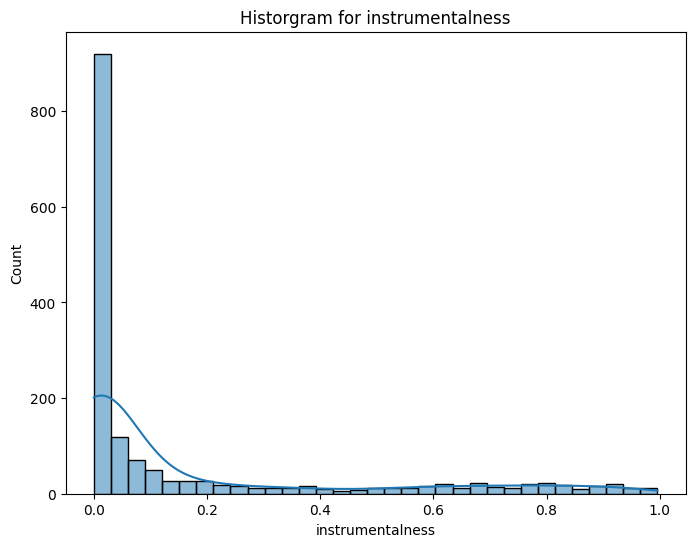

In [463]:
plt.figure(figsize=(8,6))
sns.histplot(numerical_cols['instrumentalness'], kde=True)
plt.title("Historgram for instrumentalness")
plt.show()

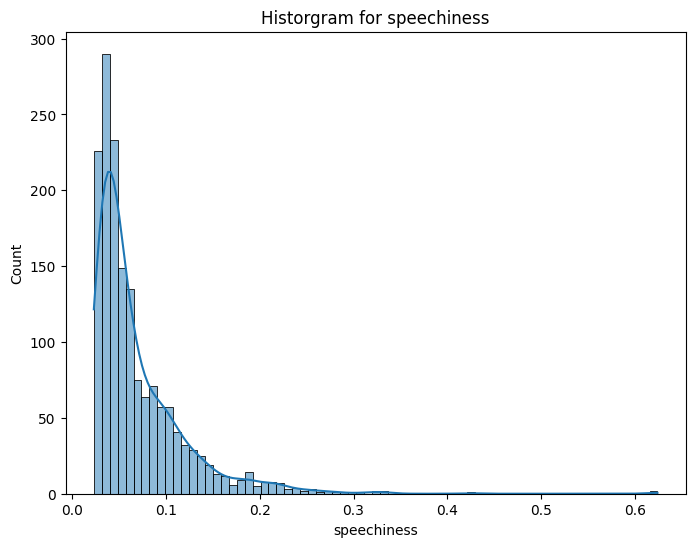

In [464]:
plt.figure(figsize=(8,6))
sns.histplot(numerical_cols['speechiness'], kde=True)
plt.title("Historgram for speechiness")
plt.show()

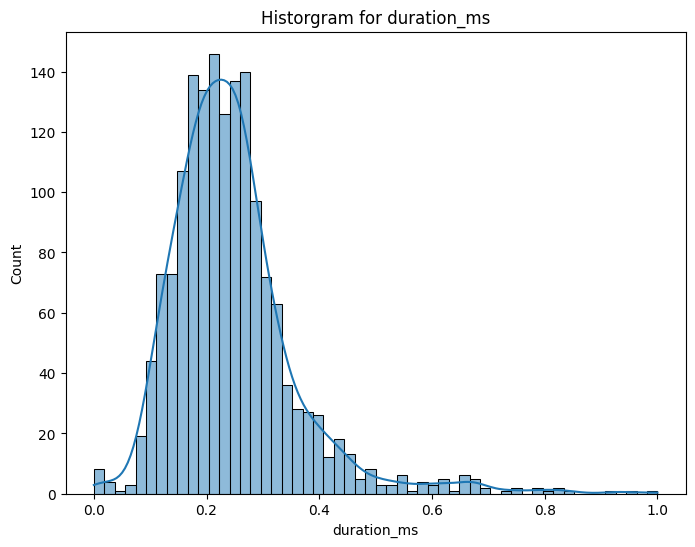

In [465]:
plt.figure(figsize=(8,6))
sns.histplot(numerical_cols['duration_ms'], kde=True)
plt.title("Historgram for duration_ms")
plt.show()

##### So we can see here that the Histogram for [`instrumentalness`, `speechiness`, `duration_ms`]  is highly rightly skewed which indicates having too many extreme values. 
##### We can perform the outlier treatment as below
1. ##### IQR Method(Trimming lower bound and upper bound outliers) - `instrumentalness`, `speechiness`
2. ##### IQR (Mean Imputation - Replacing with median value) - `duration_ms`
3. ##### Standardization - `energy` , `loudness`, `tempo`, `acousticness` (not too many outliers)

#### IQR Method(Trimming lower bound and upper bound outliers) - `instrumentalness`, `speechiness`

In [466]:
Q1 = np.percentile(df['instrumentalness'], 25)
Q3 = np.percentile(df['instrumentalness'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Trimming outliers
df = df[(df['instrumentalness'] >= lower_bound) & (df['instrumentalness'] <= upper_bound)]

# Repeat for speechiness
Q1 = np.percentile(df['speechiness'], 25)
Q3 = np.percentile(df['speechiness'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['speechiness'] >= lower_bound) & (df['speechiness'] <= upper_bound)]

#### 2. IQR - Median Imputation - `duration_ms` (with median duration)

In [467]:
def replace_outliers_with_mdeian(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    median_value = df[column].median()

    # replace outliers with median
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

    return df

In [468]:
median_impute_cols = ['duration_ms']
for col in median_impute_cols:
    df = replace_outliers_with_mdeian(df, col)

In [469]:
df.shape

(1261, 18)

In [470]:
df['popularity'].unique()

array([34, 32, 31, 30, 29, 27, 28, 26, 24, 25, 39, 22, 18, 20, 17, 19, 16,
       12, 11, 13,  9,  8, 10, 23, 15, 21, 35, 42, 14, 41, 49, 46, 44, 38,
        0,  7,  4,  5,  3,  2, 43, 37,  6,  1, 45, 36, 48, 61, 33, 53, 76,
       55, 59, 40, 54, 69, 72, 51, 71, 52, 56, 50, 66, 63, 58, 67, 80, 64])

In [471]:
df['album'].value_counts()

album
Voodoo Lounge Uncut (Live)                                              40
Honk (Deluxe)                                                           39
Some Girls (Deluxe Version)                                             36
Live Licks                                                              36
Live At The Checkerboard Lounge                                         31
                                                                        ..
Live 1965: Music From Charlie Is My Darling (Live From England/1965)     4
Goats Head Soup                                                          4
Get Yer Ya-Ya's Out! (Remastered)                                        4
Goats Head Soup (Remastered 2009)                                        2
Jamming With Edward                                                      1
Name: count, Length: 90, dtype: int64

### Visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album

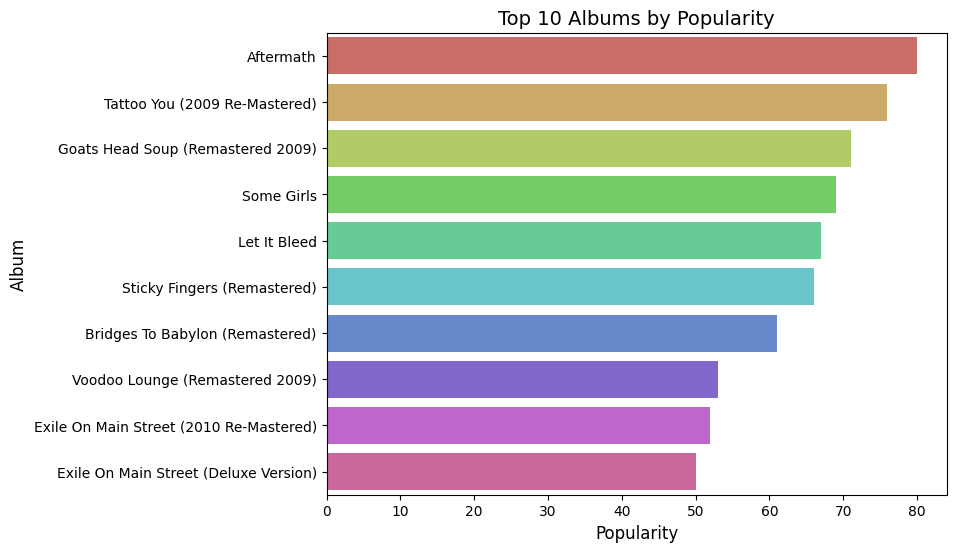

In [504]:
# ensuring unique popularity values first - this will give all the unique popularity values in the datset
df_unique_popular = df.drop_duplicates(subset='popularity')

# sort poplarity values before removing duplicate albums
df_unique_popular_sorted = df_unique_popular.sort_values(by='popularity', ascending=False)

# ensuring only unique albums in the datset- so that an album does not repeat with poplarity 
df_unique_popular_album = df_unique_popular.drop_duplicates(subset='album')

# top 10 albums based on highest popularity
top_10_popluarity_songs = df_unique_popular_album.nlargest(10, 'popularity')

plt.figure(figsize=(8,6))
sns.barplot(x='popularity', y='album', data=top_10_popluarity_songs, palette='hls')
plt.title("Top 10 Albums by Popularity", fontsize="14")
plt.xlabel("Popularity", fontsize="12")
plt.ylabel("Album", fontsize="12")
plt.show()

In [473]:
# top 2 albums
top_2_albums = top_10_popluarity_songs['album'].head(2).tolist()
print(top_2_albums)

['Aftermath', 'Tattoo You (2009 Re-Mastered)']


#### Insights
- ##### Based on the Visualization the top 2 recommendation based on popularity is "Aftermath" and "Tattoo You(2009 Re-Mastered)"

### Exploratory data analysis to dive deeper into different features of songs and identify the pattern

#### Histplot for Song features

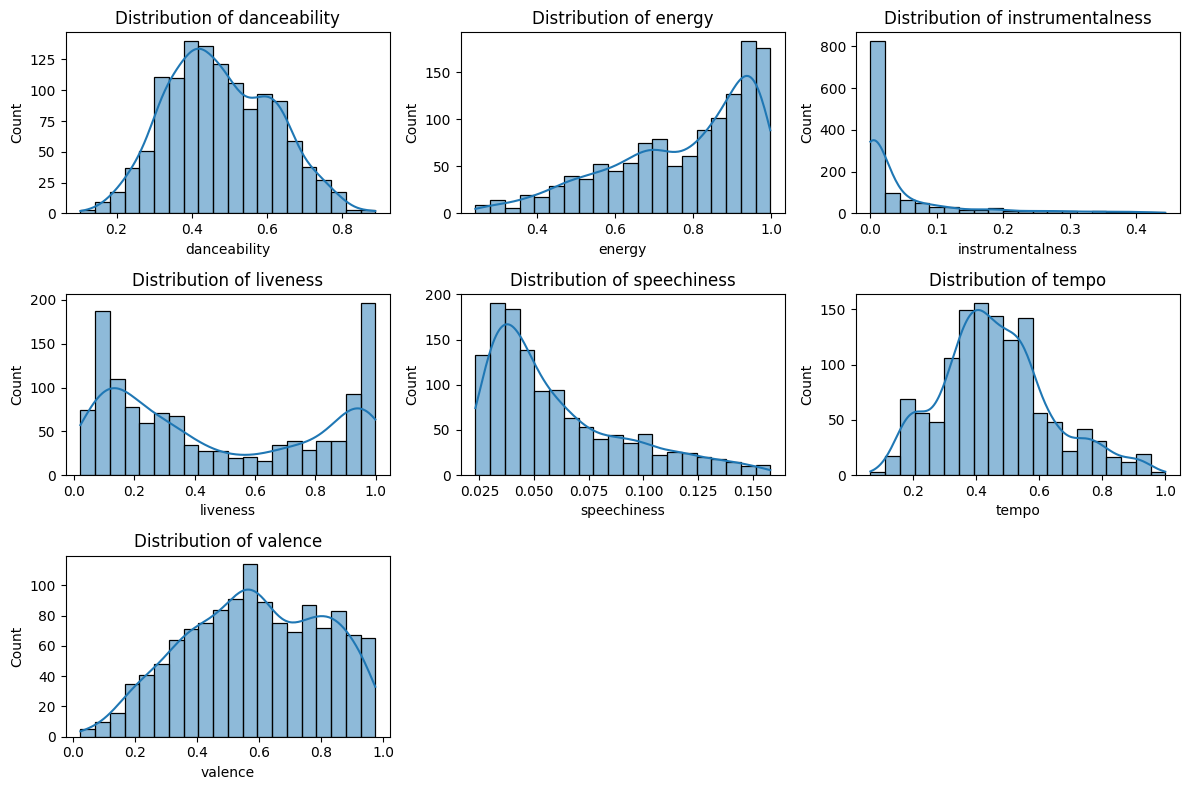

In [474]:
# Select numeric columns
features = ['danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

# histogram for each features in subplot
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

#### Insights
- ##### Danceability:
  Normally Distributed. Most songs have dancebelity with fewer songs having low or high
- ##### Energy:
  Rightly Skewed . Most songs have high energy levels present in the dataset.
- ##### Instrumentalness:
  Shows very less preferrence towards Instrumental songs. High at Zero and rightly skewed with very less Instrumental songs
- ##### Liveness:
  Suggests 2 distinct groups some has low liveness and some has high livenss
- ##### Speechiness:
  Rightly Skewed. Suggests most songs have very low specechiness, with few wrods in the songs
- ##### Tempo:
  Normally Distributed, suggests balanced variety of songs with tempo in most of the songs.
- ##### Valence:
  Mostly around 0.4 to 0.8, suggests most songs are having balanced valence

#### Correlation Heatmap of Song features

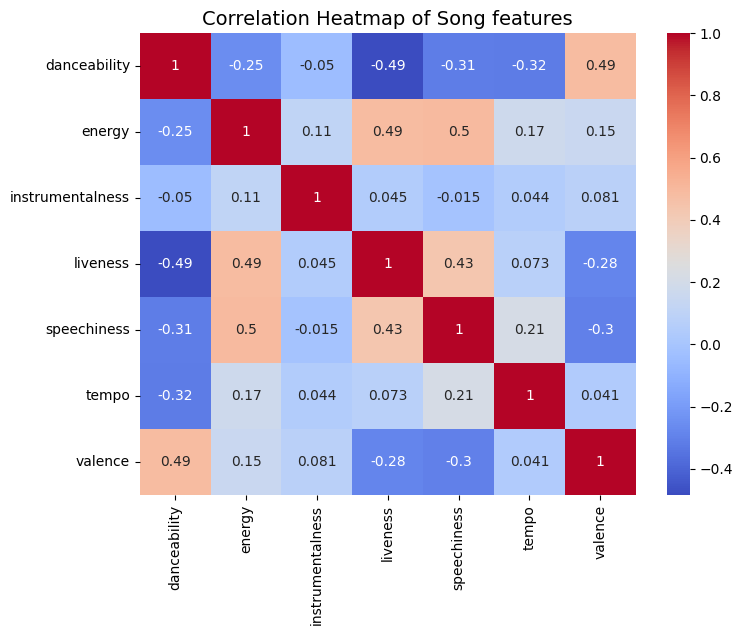

In [502]:
plt.figure(figsize=(8,6))
plt.title("Correlation Heatmap of Song features", fontsize=14)
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.show()

#### Insights
- ##### Dancebility & Valence Correlation = +0.49:
  Suggests Happier songs tends to be more dancebale
- ##### Dancebility & Liveness Correlation = -0.49:
  Suggests Live recorded songs are less dancebale

#### Discover how a song's popularity relates to various factors and how this has changed over time.

##### Visualizing Popularity over different songs features

In [476]:
# Categorising popularity as Low, Medium and High
df["popularity_label"] = pd.qcut(df["popularity"], q=3, labels=["Low", "Medium", "High"])

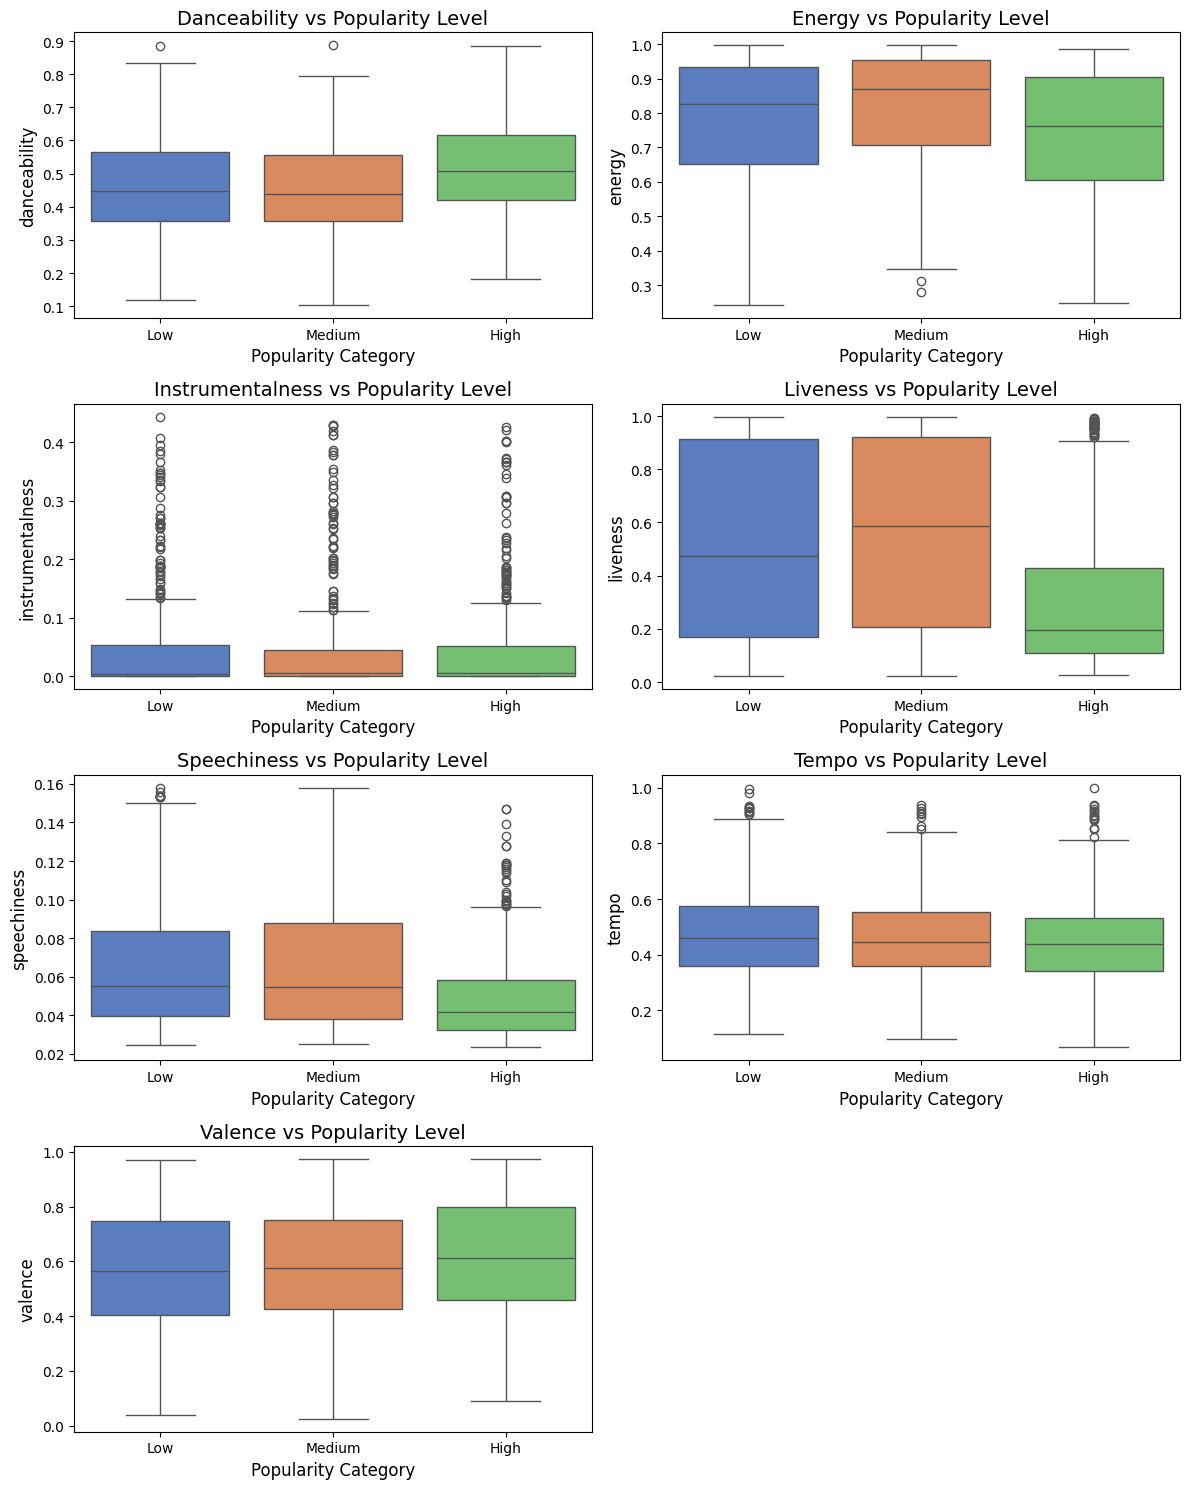

In [497]:
plt.figure(figsize=(12, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i) 
    sns.boxplot(x=df["popularity_label"], y=df[feature], palette="muted")
    plt.title(f"{feature.capitalize()} vs Popularity Level", fontsize=14)
    plt.xlabel("Popularity Category", fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

1. #### Dancebility vs Popularity Level
   The trend shows songs with higher dancebility are more poular and distribution of dancebility is similar to to all categories with hugher median popularuty of dancebility

2. #### Energy vs Popularity Level
    Trend shows that igher enrgy songs are more popular. The energy level in each categories are higher than the median.

3. #### Intrumentalness vs Popularity Level
    The trend shows there is not strong relation of Instrumentalness with popularity and Instrumental songs are less popular. There are few outliers, but does not play a major role in popularity

4. #### Liveness vs Popularity Level
    The Liveness in the music are less popular.

5. #### Speechiness vs Popularity Level
    Songs with high speechiness are less popular.

6. #### Tempo vs Popularity Level
    Tempo is equaly balanced for each categories, and  high or low tempo does not affect the popularity.

7. #### Valence vs Popularity Level
    Valence is equaly balanced for each categories, and does not play a major role in popularity. All type of sad and happy songs are popular

#### Visualizing how Popularity has changed over time.

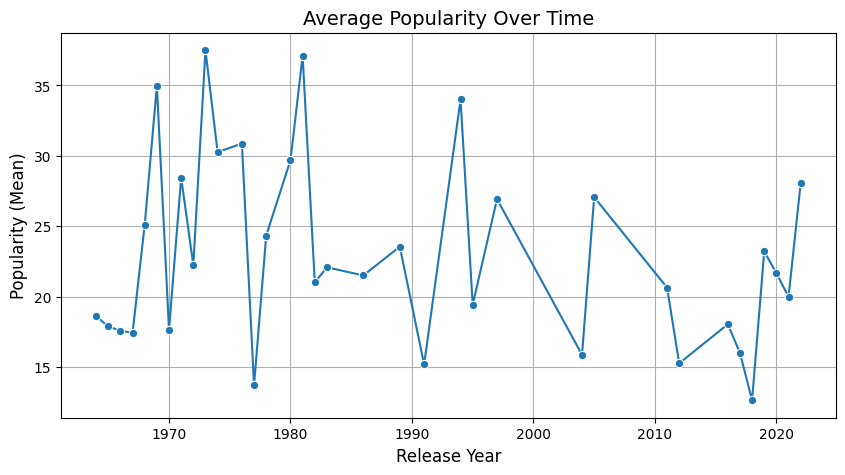

In [507]:
# Group by release year and computing mean popularity
popularity_trend = df.groupby('release_year')['popularity'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=popularity_trend, x='release_year', y='popularity', marker='o', linestyle='-')
# Formatting
plt.title('Average Popularity Over Time', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Popularity (Mean)', fontsize=12)
plt.grid(True)
plt.show()

#### Insights
The trend for Popularity of song over the Years, shows significant fluctuations, with highest popularity around the year 1970s to 1980s. There has been upward and downward trend after that over the years, whereas it shows its peaking up again after 2020 

# Dimentionality Reduction and Clsuter Analysis